Processing and classification of text data

In [3]:
import pandas as pd
import numpy as np
##1
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
##2
from PIL import Image
from sklearn.cluster import KMeans
##3
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Problem #1

In [152]:
#import data
data = pd.read_csv('medical_examination.csv')

In [153]:
features_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
scaler = StandardScaler()
normalized_data = data.copy()
normalized_data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

In [154]:
X = normalized_data.drop(columns=['cardio', 'id', 'gender', 'smoke', 'alco', 'active'])
y = normalized_data['cardio']

Principal component analysis

In [155]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [156]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [157]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

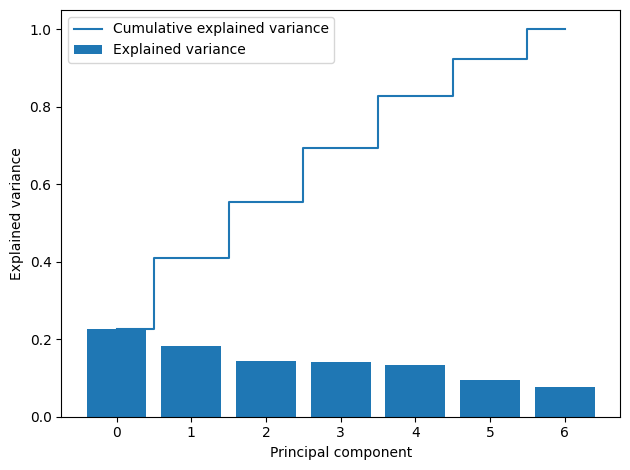

In [158]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

tSNE

In [159]:
tsne = TSNE(n_components=2)

In [ ]:
tsne_result = tsne.fit_transform(X)

In [ ]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

In [ ]:
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

For my data tsne works badly. The potential reasons are large dataset, overlapping clusters, difficulty in interpreting distances

Problem #2

In [132]:
#image_path = "nature-min.png"
#image_path = "cats.png"
#image_path = "tricolcat.png"
#image_path = "city.png"
image_path = "quantized_image_2.png"

In [134]:
# Load the image and convert it to RGB
img = Image.open(image_path).convert('RGB')
img_np = np.array(img)

# Get the dimensions of the image
w, h, d = img_np.shape
assert d == 3  # Ensure the image has 3 color channels (RGB)

# Reshape the image to a 2D array of pixels
image_array = img_np.reshape((w * h, d)).astype(np.float32)
#image_array = img_np.reshape((-1, 1)).astype(np.float32)

Quantizing to 64 colors...


c:\Users\OlesiaBrusentseva\PyProjects\proj1\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (64). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


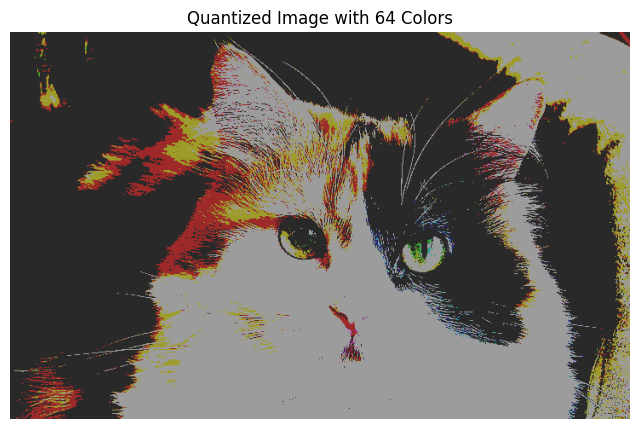

Quantized image saved as quantized_image_64.png

Quantizing to 32 colors...


c:\Users\OlesiaBrusentseva\PyProjects\proj1\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


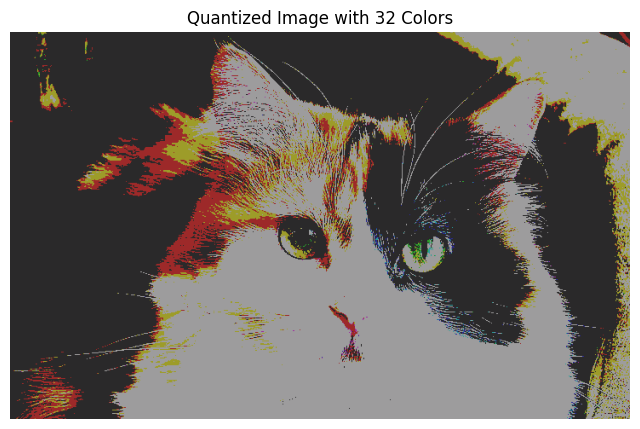

Quantized image saved as quantized_image_32.png

Quantizing to 16 colors...


c:\Users\OlesiaBrusentseva\PyProjects\proj1\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


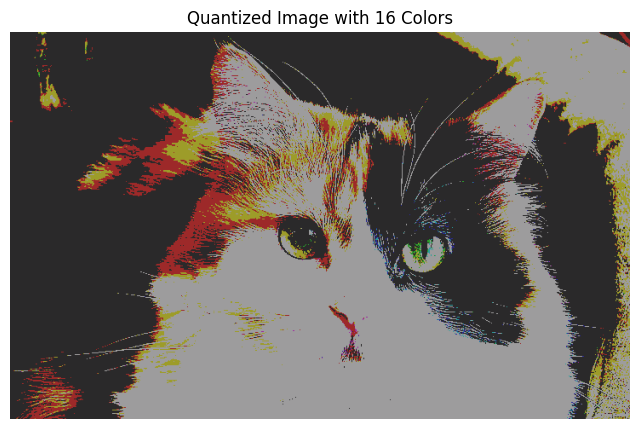

Quantized image saved as quantized_image_16.png

Quantizing to 8 colors...


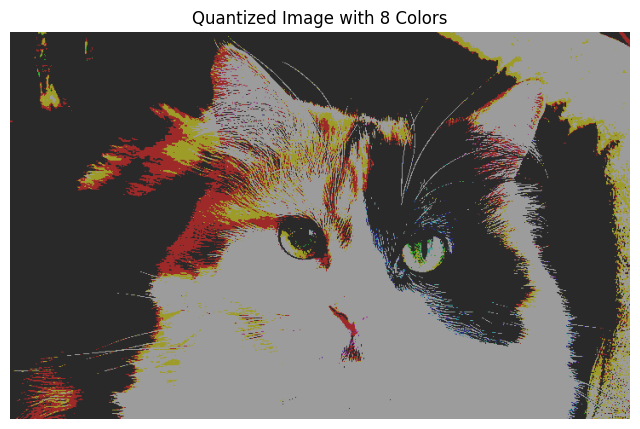

Quantized image saved as quantized_image_8.png

Quantizing to 4 colors...


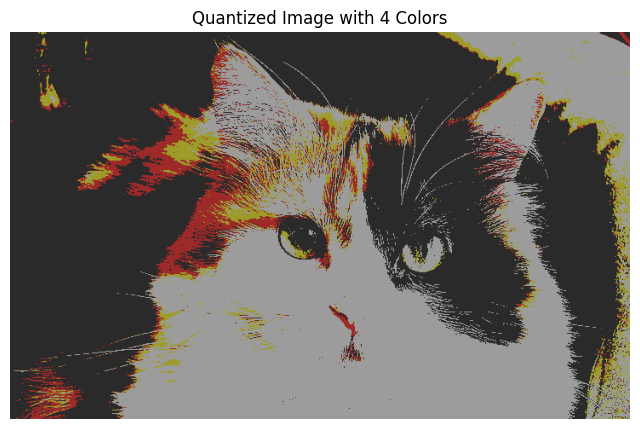

Quantized image saved as quantized_image_4.png

Quantizing to 2 colors...


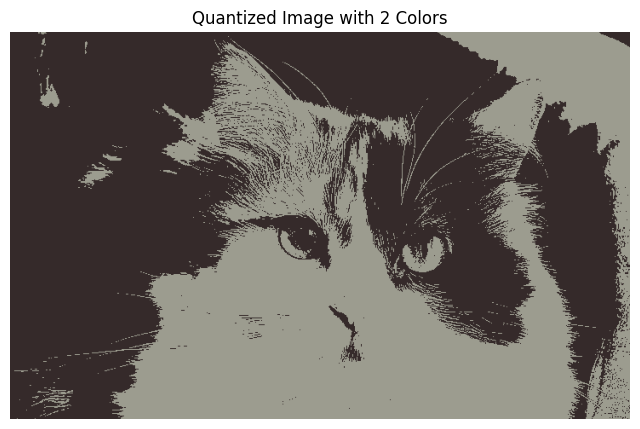

Quantized image saved as quantized_image_2.png



In [135]:

# Define the color depths to quantize to
color_depths = [64, 32, 16, 8, 4, 2]

for K in color_depths:
    print(f'Quantizing to {K} colors...')
    
    image_sample = image_array
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    kmeans.fit(image_sample)
    
    # Predict cluster indices for all pixels
    labels = kmeans.predict(image_array)
    
    # Replace each pixel with the centroid of its cluster
    quantized_array = kmeans.cluster_centers_.astype('uint8')[labels]
    
    # Reshape the quantized array back to the original image shape
    quantized_img = quantized_array.reshape((w, h, d))
    
    # Display the quantized image
    plt.figure(figsize=(8, 6))
    plt.imshow(quantized_img)
    plt.title(f'Quantized Image with {K} Colors')
    plt.axis('off')
    plt.show()
    
    # Save the quantized image
    output_image = Image.fromarray(quantized_img)
    output_image.save(f'quantized_image_{K}.png')
    print(f'Quantized image saved as quantized_image_{K}.png\n')

In [98]:
# Load and resize the image to 128x128 for faster processing
image_path = "nature-min.png"
original_image = Image.open(image_path)
small_image = original_image.resize((128, 128))
small_image_data = np.array(small_image)
#small_pixels = small_image_data.reshape(-1, 3)

In [100]:
def quantize_image(pixels, n_colors, image_shape):
    # Perform K-means clustering on the pixels
    kmeans = KMeans(n_clusters=n_colors, random_state=0, n_init=5, max_iter=300)
    kmeans.fit(pixels)
    # Replace each pixel with its nearest color center
    new_colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    quantized_pixels = new_colors[labels]
    return quantized_pixels.reshape(image_shape)

In [101]:
# Define color depths for quantization
color_depths = [64, 32, 16, 8]

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

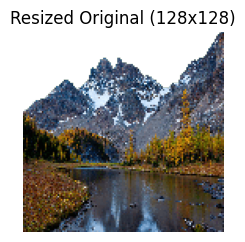

In [102]:
# Plot the resized original and quantized images
plt.figure(figsize=(15, 8))
plt.subplot(1, len(color_depths) + 1, 1)
plt.imshow(small_image)
plt.title("Resized Original (128x128)")
plt.axis("off")

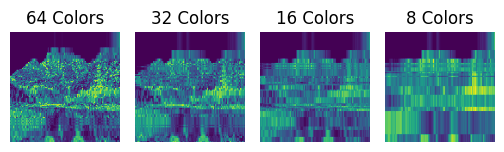

In [103]:
for i, depth in enumerate(color_depths, start=2):
    quantized_image = quantize_image(small_image_data, depth, small_image_data.shape)
    plt.subplot(1, len(color_depths) + 1, i)
    plt.imshow(quantized_image)
    plt.title(f"{depth} Colors")
    plt.axis("off")

plt.tight_layout()
plt.show()

Problem #3 Processing and classification of text data

In [4]:
#import data
text = pd.read_csv('spamtext.csv')

In [5]:
text

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [82]:
#split for further manipulations
Message = text['Message']
Category = text['Category']

In [83]:
#impoet stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [84]:
#data cleaning function
def clean_Message(Message):
    for i in range(len(Message)):
        Message[i] = str(Message[i]).lower()
        Message[i] = re.sub("@\S+", " ", Message[i])
        Message[i] = re.sub("https*\S+", " ", Message[i])
        Message[i] = re.sub("#\S+", " ", Message[i])
        Message[i] = re.sub("\d", " ", Message[i])
        Message[i] = re.sub('[%s]' % re.escape(string.punctuation), ' ', Message[i])
        Message[i] = re.sub('\n', ' ', Message[i])
        Message[i] = re.sub('\s{2,}',' ', Message[i])   
        Message[i] = ' '.join([word for word in Message[i].split(' ') if word not in stop_words])
    return Message

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\OlesiaBrusentseva\AppData\Local\Temp\ipykernel_7784\3690066476.py:5: SyntaxWarning: invalid escape sequence '\S'
  Message[i] = re.sub("@\S+", " ", Message[i])
C:\Users\OlesiaBrusentseva\AppData\Local\Temp\ipykernel_7784\3690066476.py:6: SyntaxWarning: invalid escape sequence '\S'
  Message[i] = re.sub("https*\S+", " ", Message[i])
C:\Users\OlesiaBrusentseva\AppData\Local\Temp\ipykernel_7784\3690066476.py:7: SyntaxWarning: invalid escape sequence '\S'
  Message[i] = re.sub("#\S+", " "

In [85]:
#clean data
clean_Message(Message)

0       go jurong point crazy available bugis n great ...
1                                ok lar joking wif u oni 
2       free entry wkly comp win fa cup final tkts st ...
3                    u dun say early hor u c already say 
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact u u £ pound prize claim ...
5568                         ü b going esplanade fr home 
5569                               pity mood suggestions 
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [86]:
# Separate spam and ham messages for word cloud generation
spam_messages = text[Category == 'spam']['Message']
ham_messages = text[Category == 'ham']['Message']

In [87]:
# Generate word clouds for each category
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

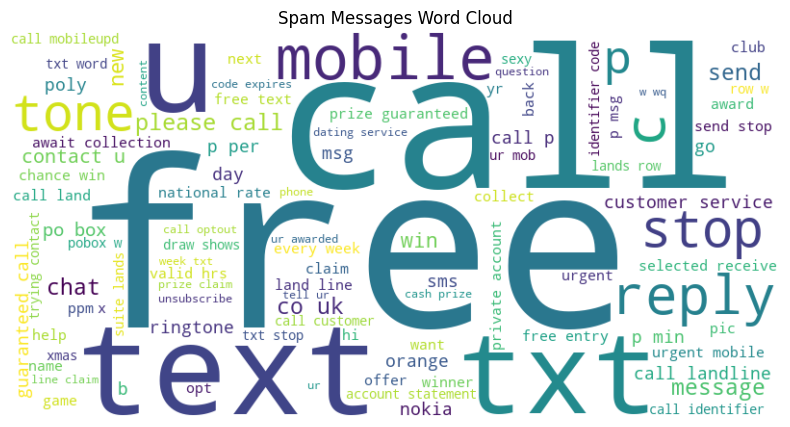

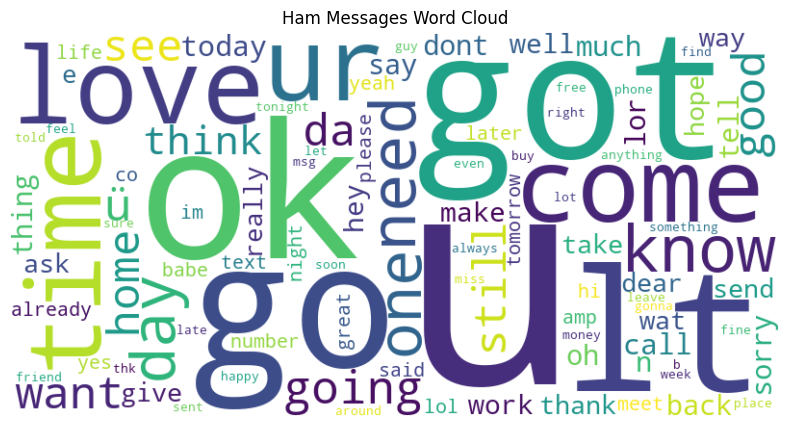

In [88]:
# Word clouds for each class
generate_wordcloud(spam_messages, "Spam Messages Word Cloud")
generate_wordcloud(ham_messages, "Ham Messages Word Cloud")

In [89]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Using unigrams and bigrams
X = vectorizer.fit_transform(text['Message'])
y = text['Category'].apply(lambda x: 1 if x == 'spam' else 0)  # Convert categories to binary labels


In [90]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a classifier (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [92]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9587443946188341
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.69      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

Confusion Matrix:
[[966   0]
 [ 46 103]]


In [1]:
text

NameError: name 'text' is not defined